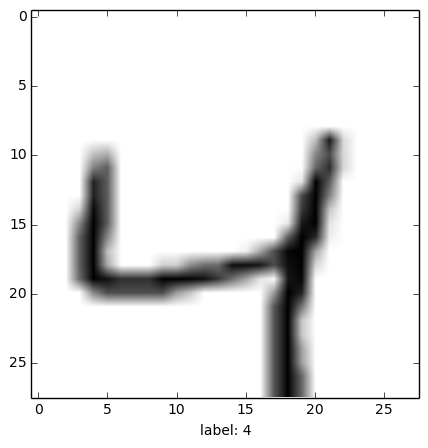

In [14]:
from struct import unpack
from PIL import Image
from numpy import zeros, uint8, array_str
import scipy.misc as smp
import gzip
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (7.0, 5.0)

def get_labeled_data(imageFile, labelFile):
    # unzip and open files in binary mode
    images = gzip.open(imageFile, 'rb')
    labels = gzip.open(labelFile, 'rb')

    # Read binary data,
    # currently in Big
    # Endian format.
    # Data is an 8-bit unsigned
    # integer.

    # get image metadata
    images.read(4) # skip magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # get label metadata
    labels.read(4) # skip magic_number
    number_of_labels = labels.read(4)
    number_of_labels = unpack('>I', number_of_labels)[0]

    if number_of_images != number_of_labels:
        raise Exception('number of labels did not match number of images')
    N = number_of_images
    
    # get the Data

    # initialize image array
    #x = zeros((N, rows, cols), dtype=uint8)
    x = zeros((rows, cols), dtype=uint8)
    # initialize label array
    #y = zeros((N, 1), dtype=uint8) # initialize label array
    y = zeros((1), dtype=uint8)
    images.read(728)
    labels.read(1)
    images.read(728)
    labels.read(1)
    #for i in range(N):
    for row in range(rows):
        for col in range(cols):
            tmp_pixel = images.read(1) # pixel is a single byte
            tmp_pixel = unpack('>B', tmp_pixel)[0]
            x[row][col] = tmp_pixel
    tmp_label = labels.read(1)
    y = unpack('>B', tmp_label)[0]
        #y[i] = unpack('>B', tmp_label)[0]

    return x, y


# call the function and show the image/labels
images, labels = get_labeled_data('train-images-idx3-ubyte.gz', 'train-labels-idx1-ubyte.gz')

label = "label: " + str(labels)
plt.xlabel(label)
plt.imshow(images, cmap=cm.binary)
plt.show()